In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns 

df = pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


/var/folders/9z/8fhm22md4kl1n7jn8htk0l2h0000gn/T/ipykernel_47303/3052041388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Survived' , y = 'Sex' , data = df , palette='rainbow')


<Axes: xlabel='Survived', ylabel='Sex'>

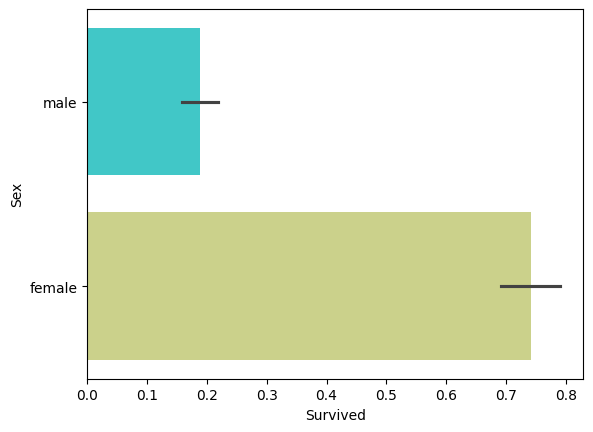

In [5]:
sns.barplot(x = 'Survived' , y = 'Sex' , data = df , palette='rainbow')